## Moment Tensor Inversion using `MTtime`

Now we can start the inversion using the input file we created. Let's take a look at `mtinv.in`.


In [1]:
import mttime

# call the Configure object to read the input file and set up the inversion
config = mttime.Configure(path_to_file="mtinv.in")

# Quick look at the attributes
print(config)

       event: {'datetime': '2019-07-16T20:11:01.470000Z', 'longitude': -121.7568, 'latitude': 37.8187}
       depth: [10.0, 12.0, 20.0]
       green: herrmann
  components: ['Z', 'R', 'T']
      degree: 5
      weight: distance
        plot: False
   correlate: False

| STATION TABLE |
   station  distance  azimuth  ts  npts   dt  Z  R  T  longitude  latitude
BK.QRDG.00     80.99   335.29  30   150 1.00  1  1  1    -122.14     38.48
BK.RUSS.00     81.16   353.18  30   150 1.00  1  1  1    -121.87     38.54
 BK.CVS.00     84.88   313.73  30   150 1.00  1  1  1    -122.46     38.35
BK.OAKV.00     88.89   320.02  30   150 1.00  1  1  1    -122.41     38.43
BK.MCCM.00    105.12   290.48  30   150 1.00  1  1  1    -122.88     38.14
BK.FARB.00    110.46   263.41  30   150 1.00  1  1  1    -123.00     37.70
BK.WELL.00    113.71    52.46  30   150 1.00  1  1  1    -120.72     38.44
 BK.SAO.00    120.23   166.71  30   150 1.00  1  1  1    -121.45     36.76
 BK.CMB.00    122.83    78.33  30   15

In [2]:
# Pass the parameters to the Inversion object and launch the inversion
# The default is to plot all solutions
tdmt = mttime.Inversion(config=config)
tdmt.invert()

Deviatoric Moment Tensor Inversion
Depth = 10.0000 km
Mw = 4.33
Percent DC/CLVD/ISO = 87/13/0
VR = 48.36%

Deviatoric Moment Tensor Inversion
Depth = 12.0000 km
Mw = 4.31
Percent DC/CLVD/ISO = 95/5/0
VR = 47.92%

Deviatoric Moment Tensor Inversion
Depth = 20.0000 km
Mw = 4.35
Percent DC/CLVD/ISO = 98/2/0
VR = 46.16%



### Figure options
 - `view="waveform"` to show the solution and waveform fits.
 - `view="depth"` to show solution as a function of source depth.
 - `view="map"` plots solution on a map.
 - `view="lune"` plots the full moment tensor source-type on a lune.

changed order!!



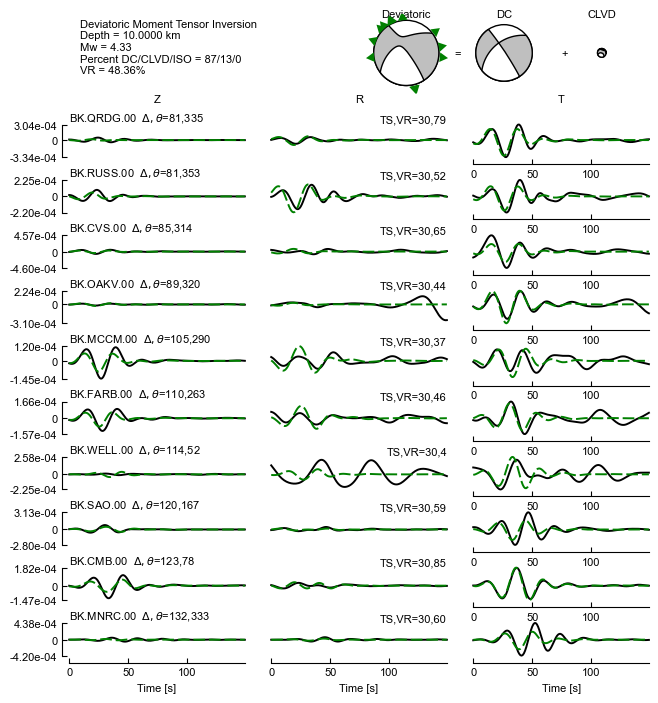

changed order!!



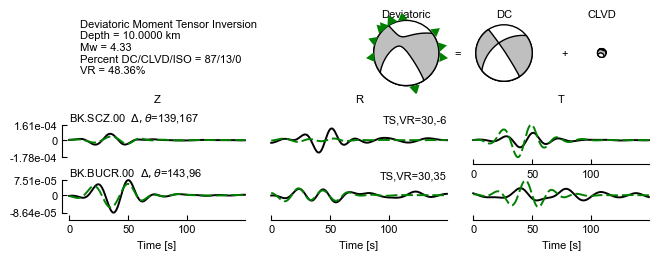

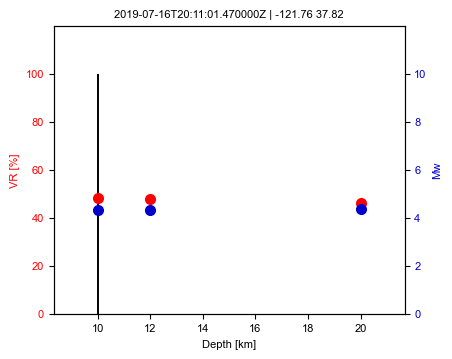

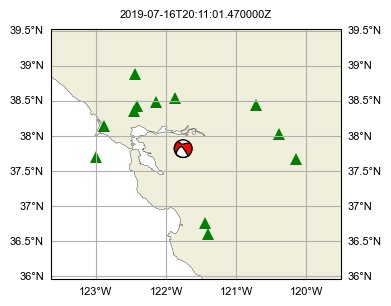

In [3]:
# To save figure to file set show=False

# Plot waveform fits of the best solution (highest VR)
tdmt.plot(view="waveform", option="preferred", show=True)
tdmt.plot(view="depth", show=True)
tdmt.plot(view="map", show=True)

Full Moment Tensor Inversion
Depth = 10.0000 km
Mw = 4.36
Percent DC/CLVD/ISO = 82/8/10
VR = 48.47%

Full Moment Tensor Inversion
Depth = 12.0000 km
Mw = 4.33
Percent DC/CLVD/ISO = 91/3/6
VR = 47.96%

Full Moment Tensor Inversion
Depth = 20.0000 km
Mw = 4.36
Percent DC/CLVD/ISO = 97/2/1
VR = 46.16%

changed order!!



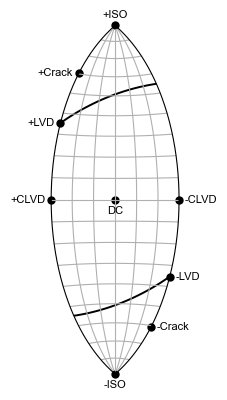

In [4]:
# Compute full moment tensor and plot the result on the lune.
config = mttime.Configure(path_to_file="mtinv.in", degree=6)
tdmt = mttime.Inversion(config=config)
tdmt.invert()
tdmt.plot(view="lune", show=True)

In [5]:
# Finally save the results to file.
# Default is to save all the results
tdmt.write()

# Setting option to 'preferred' will only save the best solution
tdmt.write(option="preferred")

### Find the best solution
Make some changes to your input file, such as changing the time shifts, removing bad stations, etc. to get a better solution. Check the solution folder.